# 1.Logistic Regression


- 연속적인 Label data가 아니라 이산적인 Label data 면 어떻게 학습해야 할까?

## 1.0 binary classification

### 어떤 value가 들어오면 0과 1로 바꿔준다!!

- 2개의 종류로 나뉘어진 데이터를 분류하는 문제입니다. 
- 스팸메일인가 아닌가
- 감자인가 말하는 감자인가
- 정상품인가 불량품인가
- 0 인가 1인가 



## 1.1 Logistic function

- Logistic regression을 진행하기 위해서는 출력 값을 0과 1의 값으로 변경해야 한다. 
- Score 를 0 과 1사이의 값으로 변경하기 위해 `Sigmoid(logistic) function` 을 사용

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

- Logistic regression을 진행할 때 입력 데이터를 $x$, 실제 class 값을 $y$, 예측된 출력 값을 $\hat{y}$라고 하면 $x$는 두가지 변환을 거쳐서 $\hat{y}$가 됩니다. 
$$z = wx + b$$
$$\hat{y} = \sigma(z)$$

### Goal
- $\hat{y}$가 실제 $y$와 가장 가깝게 되도록 하는 $w$와 $b$를 찾는 것 

In [1]:
# !pip install sympy
# !pip install autograd

In [90]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline

In [91]:
z = sympy.Symbol('z', real=True) # real = True -> 실수

logistic = 1/(1+ sympy.exp(-z))
logistic

1/(1 + exp(-z))

__참고__
- a = symbols("a", integer = True) #정수
- b = symbols("b", real = True) #실수
- c = symbols("c", complex = True) #복소수
- d = symbols("d", positive = True) #양수
- f, g = symbols("f g", cls = Function) #함수 기호로 정의

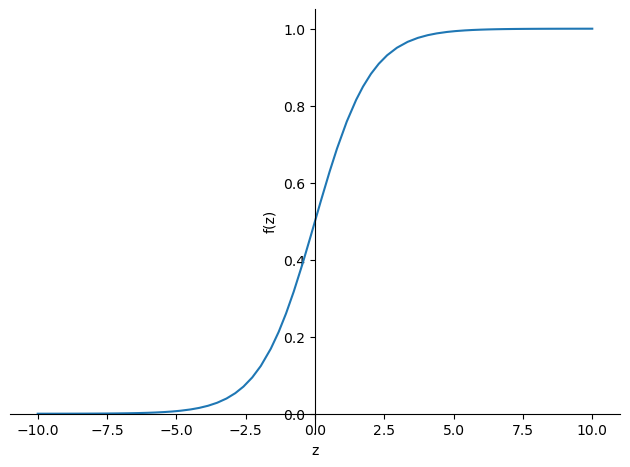

In [92]:
sympy.plotting.plot(logistic)  # 시그모이드 y값 -> 0~1

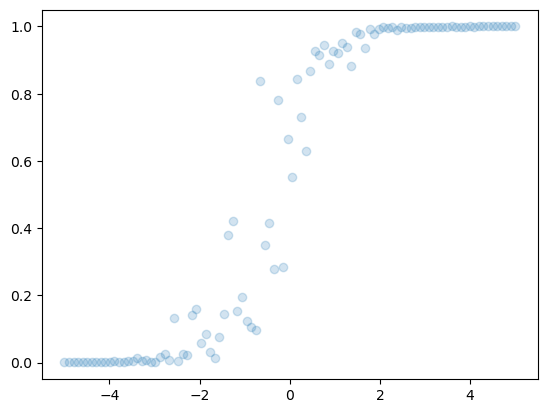

In [93]:
# nois 를 추가한 Data
x_data = numpy.linspace(-5, 5, 100)
w = 2
b = 1
numpy.random.seed(0)
z_data = w * x_data + b + numpy.random.normal(size=len(x_data)) # numpy.random.normal(size=len(x_data)) nois 추가
y_data = 1 / (1+ numpy.exp(-z_data))

pyplot.scatter(x_data, y_data, alpha=0.2)

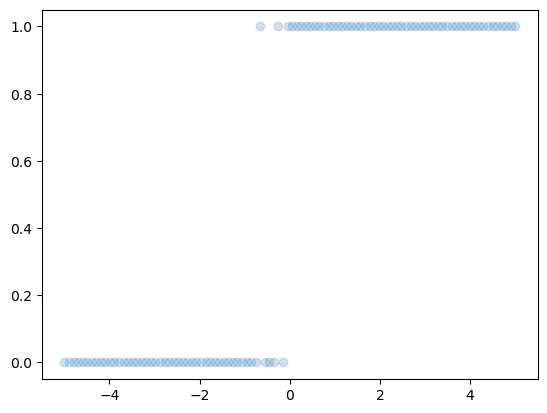

In [94]:
y_data = numpy.where(y_data >= 0.5, 1, 0) # 0.5라는 숫자 기준으로, 보다 크면 1, 작으면 0 이라고 하자.
pyplot.scatter(x_data, y_data, alpha=0.2)

## 1.2 Logistic loss function
- Predict Data $\hat{y}$과 Label $y$가 가장 가깝게 되도록 하는 $w$와 $b$를 찾는것이 우리의 목표

### Cost Function
- Linear regression -> MSE 
- Logistic regression -> ?

- Logistic regression MSE 를 적용하면 convex 한 형태가 아니다. 

- linear regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - (wx_i + b))^2$$


- logistic regression에서의 MSE
$$\frac{1}{n} \sum_{i=1}^n (y_i - \sigma(wx_i + b))^2$$

### 예
$w = 1, b=0$ , $(x, y) : (-1, 2), (-20, -1), (-5, 5)$ 일 때 cost function 그래프

In [95]:
badloss = (2 - 1/(1+ sympy.exp(-z)))**2 + \
          (-1 - 1/(1+ sympy.exp(-20*z)))**2  + \
          (5 - 1/(1+ sympy.exp(-5*z)))**2
badloss

(-1 - 1/(1 + exp(-20*z)))**2 + (2 - 1/(1 + exp(-z)))**2 + (5 - 1/(1 + exp(-5*z)))**2

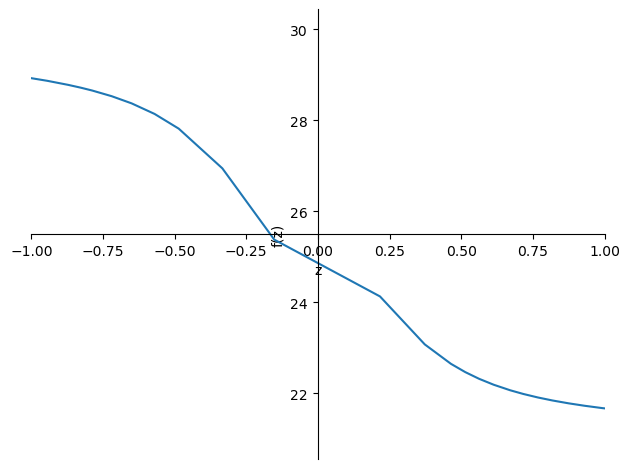

In [96]:
sympy.plotting.plot(badloss, xlim=(-1,1))

Gradient descent 방식으로 위 cost function의 최솟값을 구하게 되면 어떻게 될까? 
- 중간에 기울기가 0인 지점에서 멈추게 된다.(왜?)

# cost function $L$
- 이진분류 model에서의 cost function은 다음과 같은 함수를 사용한다. 
$$ L = -y \log(a) + (y-1)\log(1-a) $$

- 이제 실제로 차이가 클 때 $L$ 값도 커질까? 
- $y=1$인 경우 $L = -\log(a)$
- $a$ : 에측한 값
- $f(a)$ : cost_fundtion의 값

In [ ]:
sympy.plotting.plot(-sympy.log(a), xlim=(0,1))

Label class 가 1일 때 예측 값이 0에 가까워지면 cost function값이 커지고, 1에 가까워지면 cost function이 작아진다.

- $y=0$인 경우 $L = \log(1-a)$

In [ ]:
sympy.plotting.plot(-sympy.log(1-a), xlim=(0,1))

Predict 값이 label값과 가까워지면 cost function값이 작아지고 멀어지면 커지게 된다.

## 1.3 autograd function을 이용해 최적의 parameters 를 찾아보자 
- logistic regression의 전체적인 과정 구현
- Goal : GD 방식을 이용해 w와 b의 최적값을 찾아 내자

In [97]:

logistic

1/(1 + exp(-z))

In [98]:
w,b,x,y = sympy.symbols('w b x y')
logistic = 1/(1+ sympy.exp(-w*x-b)) # 학습할수 있는 형태로 재정의
logistic

1/(exp(-b - w*x) + 1)

In [99]:
# cost_fuction에 시그모이드 함수 대입
# a = logistic

Loss = -y*sympy.log(logistic) - (1-y)*sympy.log(1-logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

- autograd를 통해 미분 구현

In [107]:
# import the autograd-wrapped version of numpy
from autograd import numpy
# import the gradient calculator
from autograd import grad

In [108]:
def logistic(z):
    '''The logistic function'''
    return 1 / (1 + numpy.exp(-z))
    
def logistic_model(params, x):
    '''A prediction model based on the logistic function composed with wx+b
    Arguments:
       params: array(w,b) of model parameters
       x :  array of x data'''
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y

def log_loss(params, model, x, y):
    '''The logistic loss function
    Arguments:
       params: array(w,b) of model parameters
       model:  the Python function for the logistic model
       x, y:   arrays of input data to the model'''
    y_pred = model(params, x)
    return -numpy.mean(y * numpy.log(y_pred) + (1-y) * numpy.log(1 - y_pred))

In [109]:
# get a function to compute the gradient of the logistic loss
gradient = grad(log_loss)

In [110]:
type(gradient)

function

- grad 함수는 변수 개수만큼 output을 생성한다. 
- $w, b$ 2개의 변수가 있습니다. -> 2개의 output

In [111]:
# 랜덤으로 초기화한 변수를 넣어서 기울기값를 계산해 보자. 
numpy.random.seed(0)
params = numpy.random.rand(2)
# [w, b]
print(params)

[0.5488135  0.71518937]


In [112]:
# 이렇게 2개의 변수에 대해서 각각 기울기 값을 반환해줍니다. 
# [w, b]
gradient(params, logistic_model, x_data, y_data)

array([-0.42734877,  0.08274066])

- 기울기 값이 0에 가까워지면 더이상 반복을 하지 않는 조건을 추가

Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


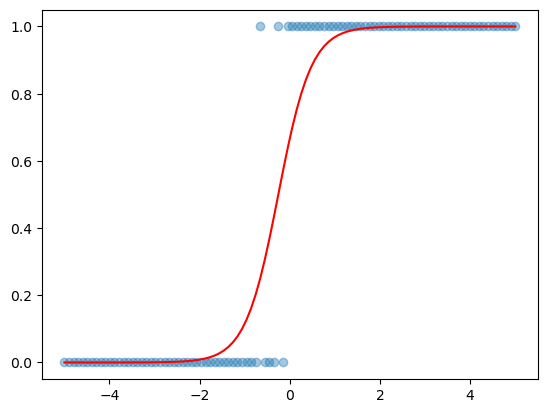

In [113]:
max_iter = 5000
i = 0
descent = numpy.ones(len(params))

while numpy.linalg.norm(descent) > 0.001 and i < max_iter:

    descent = gradient(params, logistic_model, x_data, y_data)
    params = params - descent * 0.01
    i += 1


print('Optimized value of w is {} vs. true value: 2'.format(params[0]))
print('Optimized value of b is {} vs. true value: 1'.format(params[1]))
print('Exited after {} iterations'.format(i))


pyplot.scatter(x_data, y_data, alpha=0.4)
pyplot.plot(x_data, logistic_model(params, x_data), '-r')

빨간색 곡선이 우리의 모델입니다. 

이제 기준값을 정하고 그것보다 크면 1, 작으면 0으로 분류를 하면 됩니다. 

이번에는 0.5로 설정해서 진행하겠습니다. 

In [117]:
def decision_boundary(y):
    return 1 if y >= .5 else 0

모든 점을 함수에 넣어야 하는데 하나씩 넣으면 반복문을 돌아야해서 오래걸리기 때문에 numpy의 vectorize 함수를 사용하겠습니다. 

In [119]:
decision_boundary = numpy.vectorize(decision_boundary)

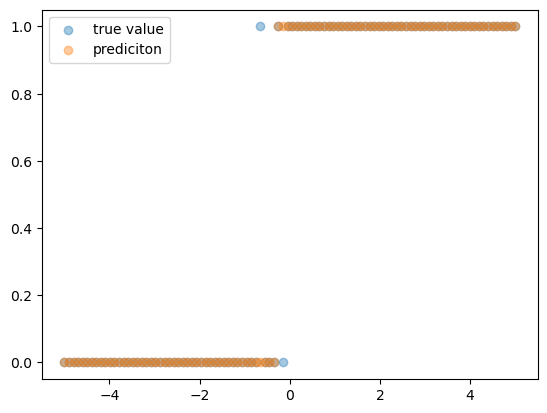

In [120]:
def classify(predictions):
    '''
    Argument:
    predictions, an array of values between 0 and 1
    
    Returns: 
    classified, an array of 0 and 1 values'''

    return decision_boundary(predictions).flatten()

pyplot.scatter(x_data, y_data, alpha=0.4,
               label='true value')
pyplot.scatter(x_data, classify(logistic_model(params, x_data)), alpha=0.4, 
               label='prediciton')

pyplot.legend() # 범례 표시